In [1]:
import scipy.io as scipy
import numpy as np
import matplotlib.pyplot as plt
import librosa
from sklearn import preprocessing
import tensorflow as tf
import os
import librosa.display

In [2]:
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
a = '/content/drive/MyDrive/Inertial/a'
b = '_s'
c = '_t'
d = '_inertial.mat'

file_list = []
for i in range(10,20):
  for j in range(1,9):
    for k in range(1,5):
      file_path = a + str(i)+b+str(j)+c+str(k)+d
      file_list.append(file_path)
for i in range(1,2):
  for j in range(1,9):
    for k in range(1,5):
      file_path = a + str(i)+b+str(j)+c+str(k)+d
      file_list.append(file_path)
for i in range(20,28):
  for j in range(1,9):
    for k in range(1,5):
      file_path = a + str(i)+b+str(j)+c+str(k)+d
      file_list.append(file_path)
for i in range(2,10):
  for j in range(1,9):
    for k in range(1,5):
      file_path = a + str(i)+b+str(j)+c+str(k)+d
      file_list.append(file_path)
file_list.remove('/content/drive/MyDrive/Inertial/a8_s1_t4_inertial.mat')
file_list.remove('/content/drive/MyDrive/Inertial/a23_s6_t4_inertial.mat')
file_list.remove('/content/drive/MyDrive/Inertial/a27_s8_t4_inertial.mat')

In [ ]:
file_list

In [6]:
def melspectrum(data):
        data_x = data[:,0]
        data_y = data[:,1]
        data_z = data[:,2]
        data_x = data_x.reshape(-1)
        data_y = data_y.reshape(-1)
        data_z = data_z.reshape(-1)
        data_xx = np.interp(np.linspace(0, data_x.size, 10000), np.arange(data_x.size), data_x)
        Sx = librosa.feature.melspectrogram(data_xx, sr=100)
        Sx_dB = librosa.power_to_db(Sx, ref=np.max)
        data_yy = np.interp(np.linspace(0, data_y.size, 10000), np.arange(data_y.size), data_y)
        Sy = librosa.feature.melspectrogram(data_yy, sr=100)
        Sy_dB = librosa.power_to_db(Sy, ref=np.max)
        data_zz = np.interp(np.linspace(0, data_z.size, 10000), np.arange(data_z.size), data_z)
        Sz = librosa.feature.melspectrogram(data_zz, sr=100)
        Sz_dB = librosa.power_to_db(Sz, ref=np.max)
        S_db = np.dstack((Sx_dB, Sy_dB, Sz_dB))
        S_norm = S_db-S_db.min()
        S_norm /= S_norm.max()
        return S_norm

In [7]:
def load_data(data_directory):
    file_names = file_list
    train_labels = []
    train_datas = []
    test_labels = []
    test_datas = []
    train_split = [1,3,5,7]
    for d in file_names:
        label = d[-21:-19]
        if 'a' in label[0]:
            label = label[-1]
        label = int(label)
        if label == 27:
          label = 0
        if int(d[-17:-16]) in train_split:
            train_labels.append(label)
            data = scipy.loadmat(d)
            data = data['d_iner'][:,:3]
            S_norm = melspectrum(data)
            train_datas.append(S_norm)
        else:
            test_labels.append(label)
            data = scipy.loadmat(d)
            data = data['d_iner'][:,:3]
            S_norm = melspectrum(data)
            test_datas.append(S_norm) 
    train_labels = np.array(train_labels)
    train_datas = np.array(train_datas)
    test_labels = np.array(test_labels)
    test_datas = np.array(test_datas)
    return train_labels,train_datas,test_labels,test_datas

In [10]:
d = '/content/drive/MyDrive/Inertial/a8_s1_t1_inertial.mat'
data = scipy.loadmat(d)
data = data['d_iner'][:,:3]

In [13]:
data_x = data[:,0]

data_x = data_x.reshape(-1)
data_xx = np.interp(np.linspace(0, data_x.size, 10000), np.arange(data_x.size), data_x)
Sx = librosa.feature.melspectrogram(y=data_xx, sr=100)


In [8]:
data_directory = '/content/drive/MyDrive/Inertial'
train_labels,train_datas,test_labels,test_datas = load_data(data_directory)

TypeError: ignored

In [ ]:
train_labels

In [ ]:
test_labels

In [ ]:
count = 0
l1 = [i for i in range(10,20)]
l2 = [i for i in range(20,27)]
l3 = [i for i in range(2,10)]
l = l1 + [1] + l2 + [0] + l3
for j in l:
  count = 0
  for i in train_labels:
    if i == j:
      count += 1
  print(count)

In [ ]:
train_arr = np.arange(train_datas.shape[0])
test_arr = np.arange(test_datas.shape[0])

np.random.seed(822)
np.random.shuffle(train_arr)
np.random.shuffle(test_arr)
train_datas_shuffled = train_datas[train_arr]
train_labels_shuffled = train_labels[train_arr]
test_datas_shuffled = test_datas[test_arr]
test_labels_shuffled = test_labels[test_arr]
print(train_datas_shuffled.shape)

(431, 128, 20, 3)


In [ ]:
train_datas = tf.image.resize(train_datas_shuffled,[224,224])
test_datas = tf.image.resize(test_datas_shuffled,[224,224])
train_labels = train_labels_shuffled
test_labels = test_labels_shuffled

In [ ]:
train_datas = (train_datas-0.5)*2
test_datas = (test_datas-0.5)*2

In [ ]:
valid_datas = test_datas
valid_labels = test_labels
#valid_datas = test_datas[0:100]
#valid_labels = test_labels[0:100]
#test_datas = test_datas[101:]
#test_labels = test_labels[101:]
print(train_datas.shape)
print(test_datas.shape)
print(valid_datas.shape)

(431, 224, 224, 3)
(430, 224, 224, 3)
(430, 224, 224, 3)


In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_datas, train_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((test_datas, test_labels))
valid_dataset = tf.data.Dataset.from_tensor_slices((valid_datas, valid_labels))

In [ ]:
#AUTOTUNE = tf.data.AUTOTUNE
#train_dataset = train_dataset.cache().prefetch(buffer_size=AUTOTUNE)
#valid_dataset = valid_datas.cache().prefetch(buffer_size=AUTOTUNE)
#test_dataset = test_dataset.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
buffer_size = train_datas.shape[0]
batch_size = 8
train_dataset = train_dataset.shuffle(buffer_size=buffer_size)\
                    .batch(batch_size,drop_remainder=True).prefetch(AUTOTUNE)

valid_dataset = valid_dataset.batch(batch_size,drop_remainder=True).prefetch(AUTOTUNE)

In [ ]:
def plot_batch_sizes(ds):
  batch_sizes = [batch.shape[0] for batch in ds]
  plt.bar(range(len(batch_sizes)), batch_sizes)
  plt.xlabel('Batch number')
  plt.ylabel('Batch size')

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,Input,Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import ResNet50

In [ ]:
num_classes = 27

In [ ]:
inputs = keras.Input(shape=(224,224,3),name='input_inertial')
resnet_inertial = ResNet50(include_top=False, weights='imagenet', input_tensor=inputs, input_shape=(224,224,3),pooling='max')
for layer in resnet_inertial.layers:
    layer._name = layer.name + '_inertial'
#x = Dense(512, activation='relu')(x)
#x = Dense(128, activation='relu')(x)
outputs = Dense(num_classes, activation='softmax')(resnet_inertial.output)
model = tf.keras.Model(inputs, outputs)

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
base_learning_rate = 0.001
sgd = tf.keras.optimizers.SGD(learning_rate=base_learning_rate,decay=1e-6,momentum=0.9,nesterov=True)
adam=tf.keras.optimizers.Adam(learning_rate=base_learning_rate)
model.compile(optimizer=sgd,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
len(model.trainable_variables)

214

In [ ]:
checkpoint_filepath = '/content/drive/MyDrive/individual_project/checkpoint_fullmodel/inertial_weights.h5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)  
#model.save_weights(checkpoint_path)
#model.load_weights(checkpoint_filepath)
history = model.fit(train_dataset,validation_data=valid_dataset,epochs=50,verbose=2,callbacks=[model_checkpoint_callback])

Epoch 1/50
53/53 - 442s - loss: 16.0667 - accuracy: 0.0660 - val_loss: 4102.7173 - val_accuracy: 0.0377 - 442s/epoch - 8s/step
Epoch 2/50
53/53 - 421s - loss: 3.6674 - accuracy: 0.1085 - val_loss: 3.3036 - val_accuracy: 0.0377 - 421s/epoch - 8s/step
Epoch 3/50
53/53 - 412s - loss: 2.8221 - accuracy: 0.2429 - val_loss: 3.3071 - val_accuracy: 0.0377 - 412s/epoch - 8s/step
Epoch 4/50
53/53 - 420s - loss: 2.2917 - accuracy: 0.3042 - val_loss: 3.3013 - val_accuracy: 0.0377 - 420s/epoch - 8s/step
Epoch 5/50
53/53 - 421s - loss: 1.8983 - accuracy: 0.4316 - val_loss: 3.3013 - val_accuracy: 0.0377 - 421s/epoch - 8s/step
Epoch 6/50
53/53 - 419s - loss: 1.4730 - accuracy: 0.5472 - val_loss: 3.2992 - val_accuracy: 0.0377 - 419s/epoch - 8s/step
Epoch 7/50
53/53 - 417s - loss: 1.2548 - accuracy: 0.6038 - val_loss: 3.2985 - val_accuracy: 0.0377 - 417s/epoch - 8s/step
Epoch 8/50
53/53 - 420s - loss: 1.0802 - accuracy: 0.6580 - val_loss: 3.2887 - val_accuracy: 0.0354 - 420s/epoch - 8s/step
Epoch 9/50
5

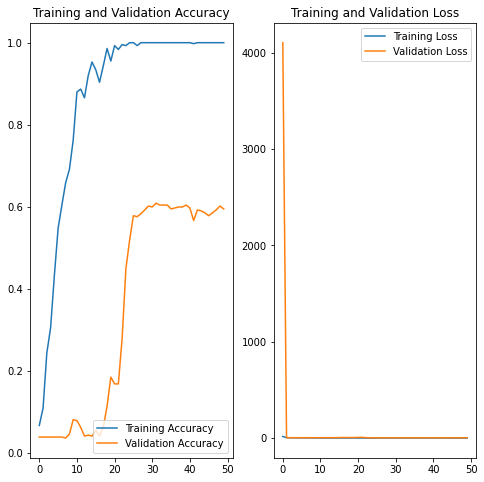

In [ ]:
epochs = 50
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
with open("/content/drive/MyDrive/individual_project/inertial_result_2.txt", "w") as file:
    for item in acc:
        file.write(str(item) + "\n")
    file.write("\n")
    for item in val_acc:
        file.write(str(item) + "\n")
    file.write("\n")
    for item in loss:
        file.write(str(item) + "\n")
    file.write("\n")
    for item in val_loss:
        file.write(str(item) + "\n")